In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df = pd.read_csv(r'C:\Users\chowd\Music\ITML06 Sleep disorder\Dataset\Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
#checking for missing values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [4]:
#replacing the null values with 'None' in the column 'Sleep Disorder'
df['Sleep Disorder'].fillna('None', inplace=True)

In [5]:
#drop column Person ID
df.drop('Person ID', axis=1, inplace=True)

In [6]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())

Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


In [7]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [8]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [9]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [10]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['None' 'Sleep Apnea' 'Insomnia']


In [11]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

<Axes: xlabel='Sleep Disorder', ylabel='count'>

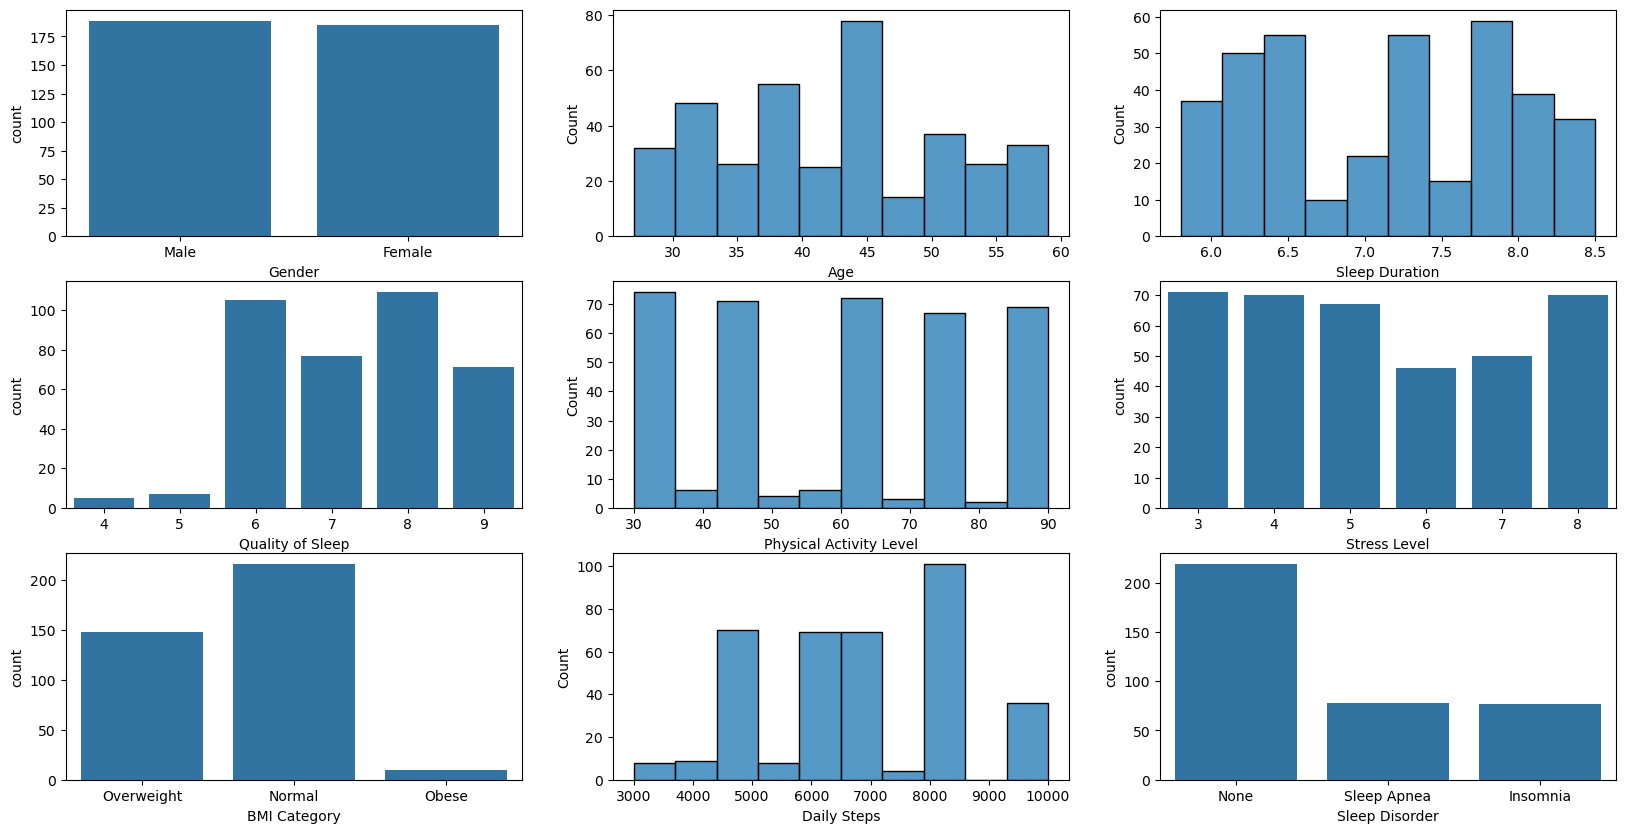

In [12]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0])
sns.histplot(x = 'Age', data = df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = df, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = df, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2,2])

Text(0.5, 1.0, 'Gender and Sleep Disorder')

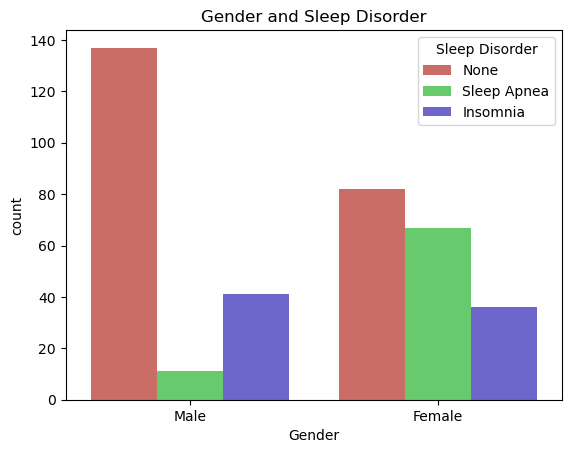

In [13]:
#Gender count plot
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

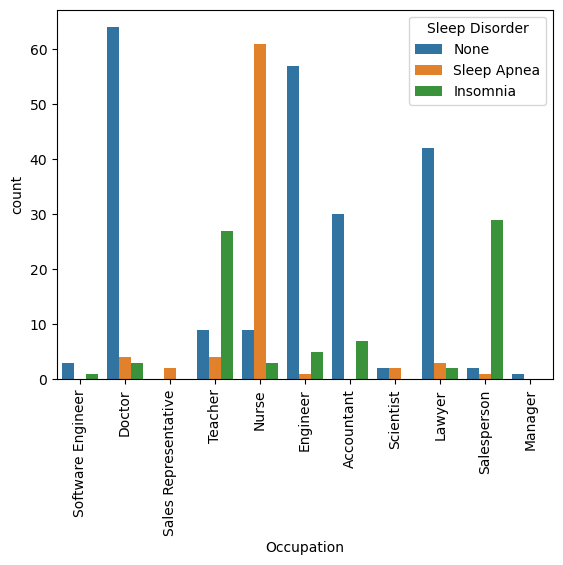

In [14]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

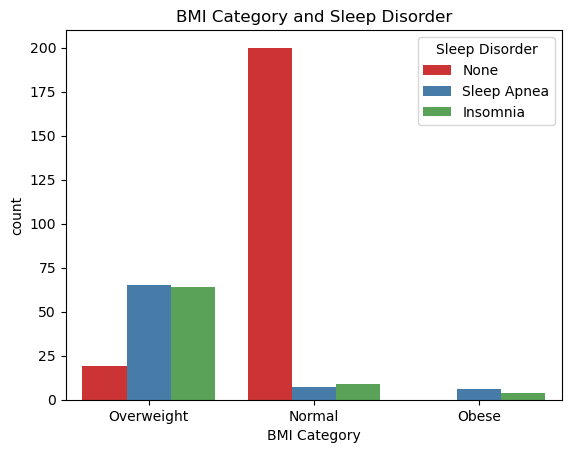

In [15]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'Set1').set_title('BMI Category and Sleep Disorder')

In [16]:
from sklearn.utils import resample
# Separate the classes
none_df = df[df['Sleep Disorder'] == 'None']
sleep_apnea_df = df[df['Sleep Disorder'] == 'Sleep Apnea']
insomnia_df = df[df['Sleep Disorder'] == 'Insomnia']

In [17]:
# Upsample the minority classes to 500 samples each
none_upsampled = resample(none_df, 
                           replace=True,    # sample with replacement
                           n_samples=500,   # to match majority class
                           random_state=42) # reproducible results

In [18]:
sleep_apnea_upsampled = resample(sleep_apnea_df, 
                                  replace=True, 
                                  n_samples=500, 
                                  random_state=42)

In [19]:
insomnia_upsampled = resample(insomnia_df, 
                              replace=True, 
                              n_samples=500, 
                              random_state=42)

In [20]:
# Combine the upsampled dataframes
upsampled_df = pd.concat([none_upsampled, sleep_apnea_upsampled, insomnia_upsampled])

In [21]:
# Shuffle the resulting dataframe
upsampled_df = upsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
# Display the distribution of the Sleep Disorder column
print(upsampled_df['Sleep Disorder'].value_counts())

Sleep Disorder
Insomnia       500
None           500
Sleep Apnea    500
Name: count, dtype: int64


In [23]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [25]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [26]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [27]:
from sklearn import preprocessing
import pickle

In [28]:
# Gender Encoding
gen_enc = preprocessing.LabelEncoder()
upsampled_df['Gender'] = gen_enc.fit_transform(upsampled_df['Gender'])
gender_mapping = {i: class_ for i, class_ in enumerate(gen_enc.classes_)}
pickle.dump(gen_enc, open('gen_le.pkl', 'wb'))

# Occupation Encoding
occ_enc = preprocessing.LabelEncoder()
upsampled_df['Occupation'] = occ_enc.fit_transform(upsampled_df['Occupation'])  # Use occ_enc here
occupation_mapping = {i: class_ for i, class_ in enumerate(occ_enc.classes_)}  # Now accessing occ_enc
pickle.dump(occ_enc, open('occ_le.pkl', 'wb'))

# BMI Category Encoding
bmi_enc = preprocessing.LabelEncoder()
upsampled_df['BMI Category'] = bmi_enc.fit_transform(upsampled_df['BMI Category'])  # Use bmi_enc here
bmi_mapping = {i: class_ for i, class_ in enumerate(bmi_enc.classes_)}  # Now accessing bmi_enc
pickle.dump(bmi_enc, open('bmi_le.pkl', 'wb'))

# Sleep Disorder Encoding
sleep_enc = preprocessing.LabelEncoder()
upsampled_df['Sleep Disorder'] = sleep_enc.fit_transform(upsampled_df['Sleep Disorder'])  # Use sleep_enc here
sleep_mapping = {i: class_ for i, class_ in enumerate(sleep_enc.classes_)}  # Now accessing sleep_enc
pickle.dump(sleep_enc, open('sleep_le.pkl', 'wb'))

In [29]:
print("Gender Mapping:", gender_mapping)
print("Occupation Mapping:", occupation_mapping)
print("BMI Category Mapping:", bmi_mapping)
print("Sleep Disorder Mapping:", sleep_mapping)

Gender Mapping: {0: 'Female', 1: 'Male'}
Occupation Mapping: {0: 'Accountant', 1: 'Doctor', 2: 'Engineer', 3: 'Lawyer', 4: 'Manager', 5: 'Nurse', 6: 'Sales Representative', 7: 'Salesperson', 8: 'Scientist', 9: 'Software Engineer', 10: 'Teacher'}
BMI Category Mapping: {0: 'Normal', 1: 'Obese', 2: 'Overweight'}
Sleep Disorder Mapping: {0: 'Insomnia', 1: 'None', 2: 'Sleep Apnea'}


In [30]:
#upsampled_df.to_csv('unsampled_df.csv', index=False)

<Axes: >

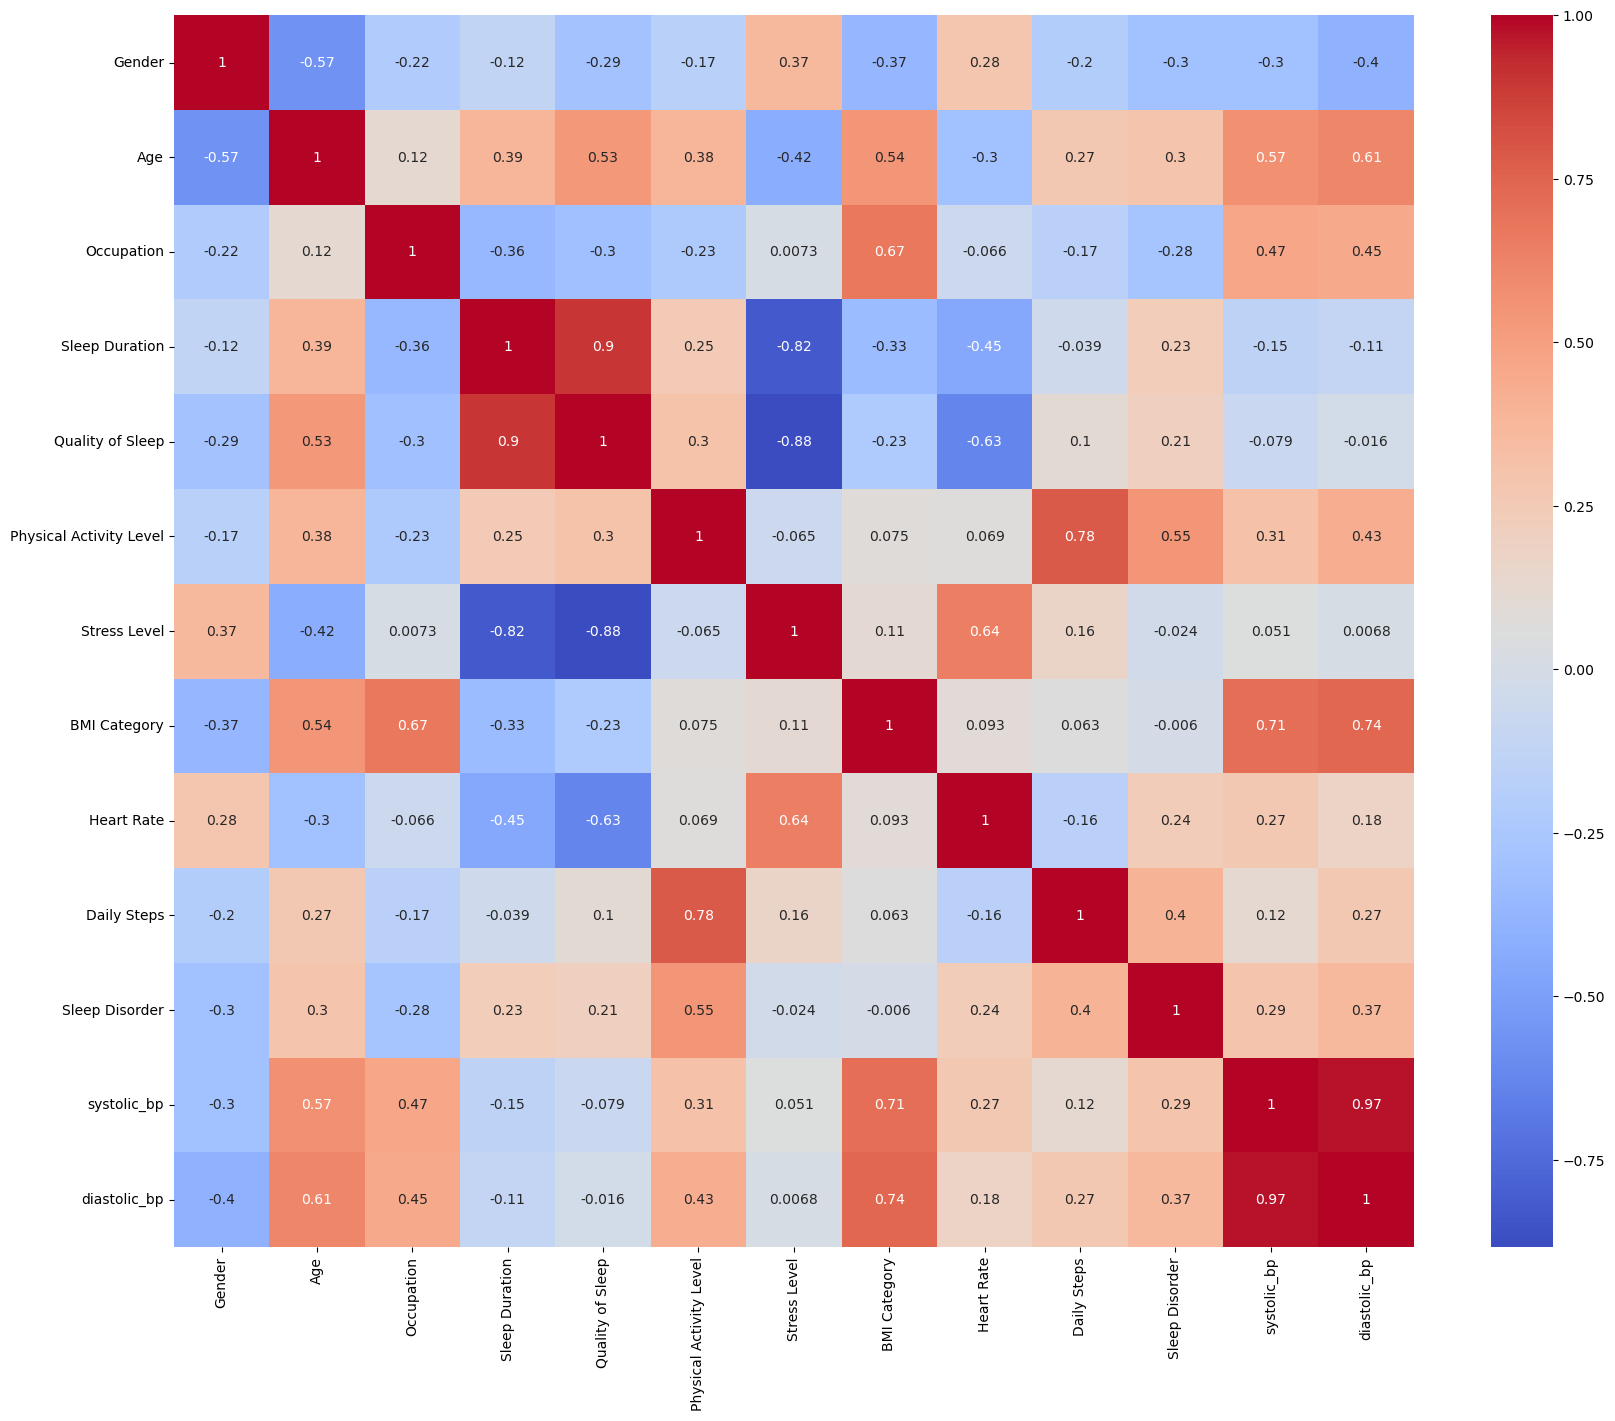

In [31]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(upsampled_df.corr(), annot = True, cmap = 'coolwarm')

<Axes: xlabel='Sleep Disorder', ylabel='count'>

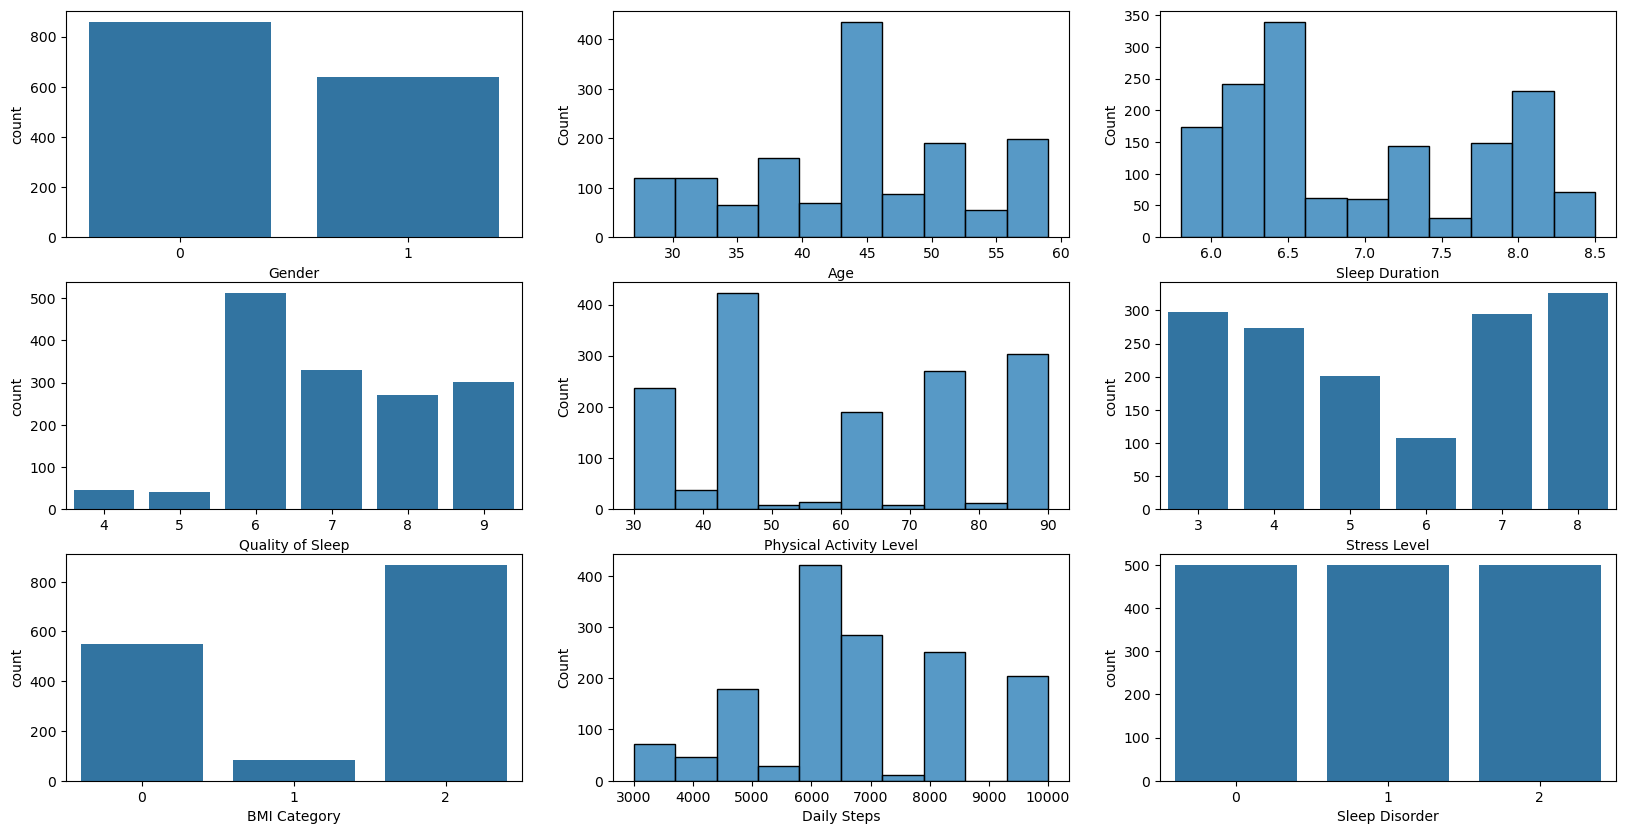

In [32]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = upsampled_df, ax = ax[0,0])
sns.histplot(x = 'Age', data = upsampled_df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = upsampled_df, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = upsampled_df, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = upsampled_df, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = upsampled_df, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = upsampled_df, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = upsampled_df, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = upsampled_df, ax = ax[2,2])

Text(0.5, 1.0, 'Gender and Sleep Disorder')

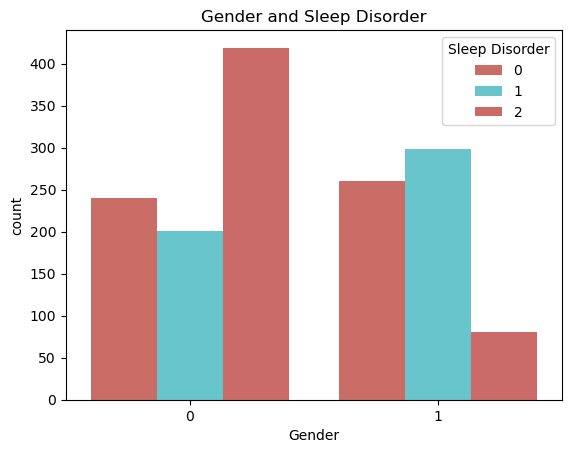

In [33]:
#Gender count plot
sns.countplot(x = 'Gender', data = upsampled_df, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

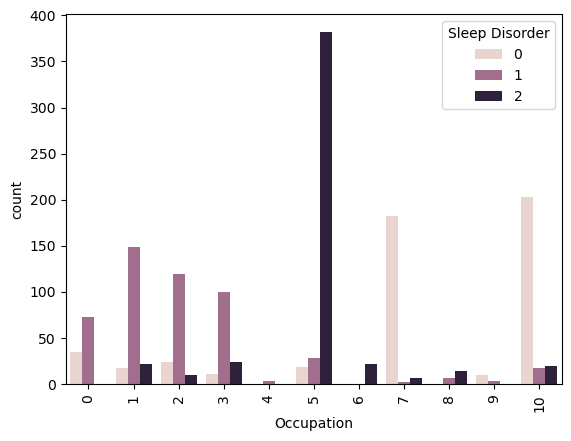

In [34]:
ax = sns.countplot(x = 'Occupation', data = upsampled_df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

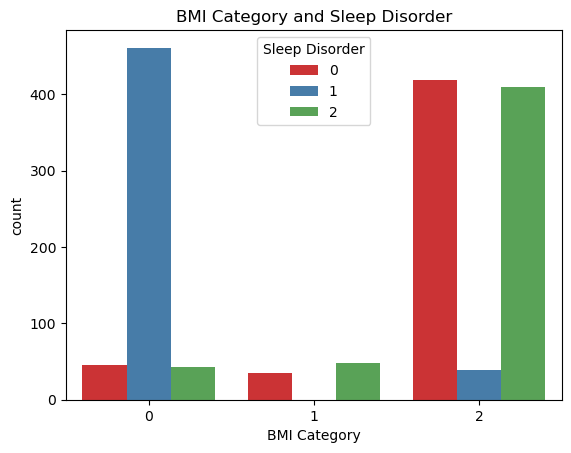

In [35]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = upsampled_df, palette = 'Set1').set_title('BMI Category and Sleep Disorder')

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(upsampled_df.drop('Sleep Disorder',axis=1), upsampled_df['Sleep Disorder'], test_size=0.3, random_state=42)

In [37]:
X_train

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,systolic_bp,diastolic_bp
485,0,58,5,8.0,9,75,3,2,68,7000,140,95
527,0,51,5,6.1,6,90,8,2,75,10000,140,95
199,0,37,0,7.2,8,60,4,0,68,7000,115,75
889,1,32,2,7.5,8,45,3,0,70,8000,120,80
844,0,51,5,6.0,6,90,8,2,75,10000,140,95
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,38,0,7.1,8,60,4,0,68,7000,115,75
1294,1,43,2,7.8,8,90,5,0,70,8000,130,85
860,1,42,3,7.8,8,90,5,0,70,8000,130,85
1459,0,57,5,8.2,9,75,3,2,68,7000,140,95


In [38]:
y_train

485     2
527     2
199     1
889     1
844     2
       ..
1130    1
1294    1
860     1
1459    2
1126    0
Name: Sleep Disorder, Length: 1050, dtype: int32

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [40]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
#training accuracy
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.939047619047619


In [42]:
d_pred = dtree.predict(X_test)
d_pred

array([1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2,
       2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1,
       1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 0,
       2, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2,
       0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0,
       1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0,

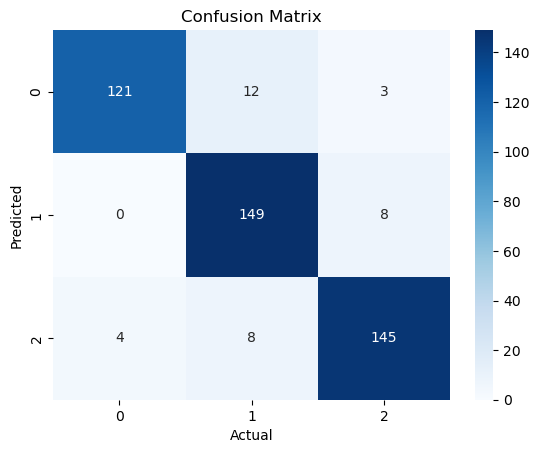

In [43]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

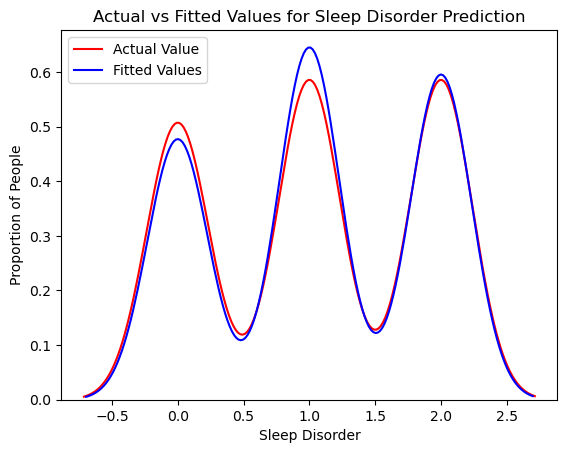

In [44]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       136
           1       0.88      0.95      0.91       157
           2       0.93      0.92      0.93       157

    accuracy                           0.92       450
   macro avg       0.93      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
#Training accuracy
print("Training accuracy: ",rfc.score(X_train,y_train))

Training accuracy:  0.939047619047619


In [49]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2,
       2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1,
       1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 0,
       2, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2,
       0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0,
       1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0,

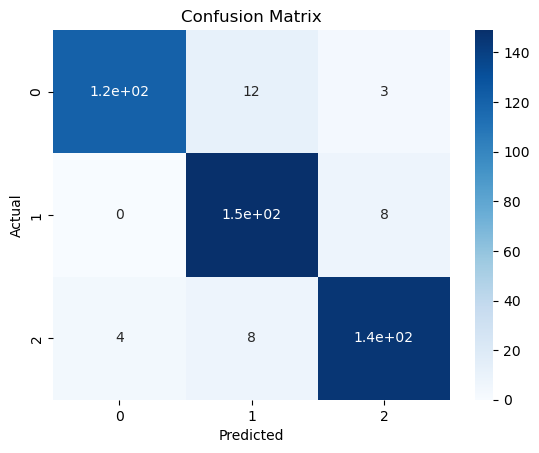

In [50]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

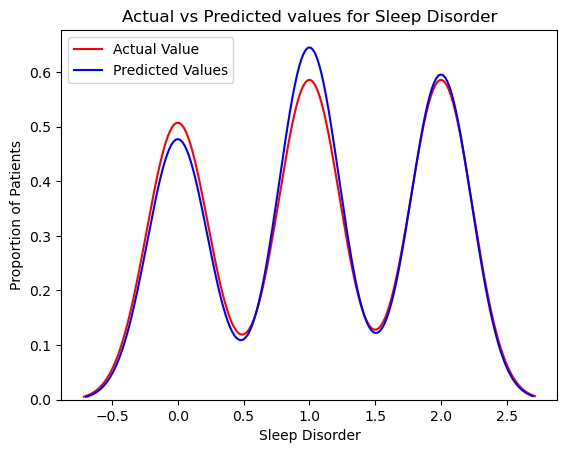

In [51]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.legend()
plt.show()

In [52]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       136
           1       0.88      0.95      0.91       157
           2       0.93      0.92      0.93       157

    accuracy                           0.92       450
   macro avg       0.93      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



In [53]:
pickle.dump(dtree, open('dt_model.pkl', 'wb'))
pickle.dump(rfc, open('rf_model.pkl', 'wb'))